In [4]:
from transformers import pipeline, AutoTokenizer
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"

# tokenizer = AutoTokenizer.from_pretrained(MODEL)
# config = AutoConfig.from_pretrained(MODEL)
# model = AutoModelForSequenceClassification.from_pretrained(MODEL)
sentiment_task = pipeline("sentiment-analysis", model=MODEL, tokenizer=MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [6]:
# Load the data
data = pd.read_csv('../output/preprocessed.csv')

/tmp/ipykernel_48758/3128184025.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../output/preprocessed.csv')


In [7]:
# Apply sentiment analysis to each row in the 'text' column
data.loc[:1000, 'sentiment'] = data.loc[:1000, 'text'].apply(lambda x: sentiment_task(x)[0]['label'] if pd.notnull(x) else None)

# Display the first few rows of the dataframe to verify the results
print(data[['text', 'sentiment']].head())

                                                text sentiment
0  run business mean juggle countless administrat...  positive
1  liz truss walk linger shadow predecessor charl...  negative
2  uk brace war government building london raise ...   neutral
3  marry second cousin remove taboo think genetic...   neutral
4  truly disgraceful indian national congress sto...  negative


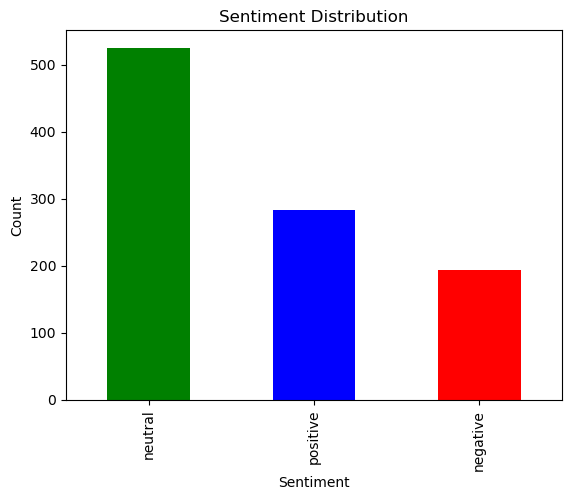

In [8]:
# Count the occurrences of each sentiment
sentiment_counts = data.loc[:1000, 'sentiment'].value_counts()

# Plot the sentiment distribution
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()